# _ _ _ _ _ _ _ _ _ _ _ _  Tumor Diagnosis Project _ _ _ _ _ _ _ _ _ _ _ _
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space.

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

There are two main classifications of tumors. One is known as **benign** and the other as **malignant**. 

A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. 

A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

###  Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('data.csv')

# _ _ _ _ _ _ _ _ _ _ _ _ Exploratory Data Analysis _ _ _ _ _ _ _ _ _ _ _ _

---

### Separate Target from Features


In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
y = data.diagnosis #target values/labels

drop_cols = ['Unnamed: 32', 'id', 'diagnosis'] #dropping columns we don't need

x = data.drop(drop_cols, axis=1) #creating feature matrix
                                 #axis=1 specifies column drop
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###  Plot Diagnosis Distributions


Number of Benign Tumors:  357
Number of Malignant Tumors:  212


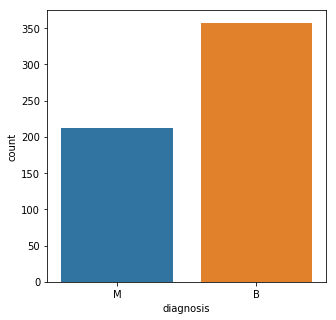

In [6]:
#To visualize a class imbalance problem in the target values
plt.figure(figsize=(5,5))

ax = sns.countplot(y, label="Count")

B,M = y.value_counts()

print('Number of Benign Tumors: ', B)
print('Number of Malignant Tumors: ', M)

#A lot more Benign cases present than the Malignant ones

In [7]:
#Descriptive statistics of the feature values
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# _ _ _ _ _ _ _ _ _ _ _ _ Data Visualization _ _ _ _ _ _ _ _ _ _ _ _

---

### Visualizing Standardized Data with Seaborn


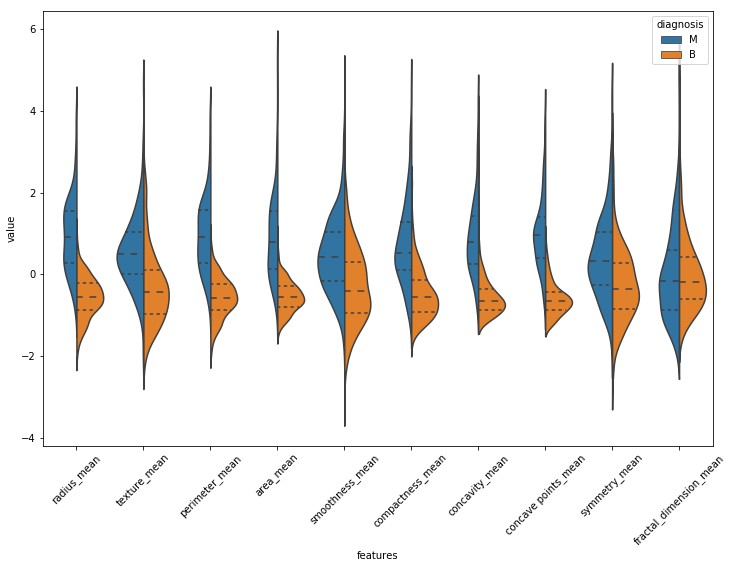

In [8]:
data = x
data_std = (data - data.mean()) / data.std()
#dividing the data into a wide structure
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1) #first 10 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
#plotting this data 
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data,
              split=True, inner='quart')
plt.xticks(rotation=45);

### Violin Plots and Box Plots


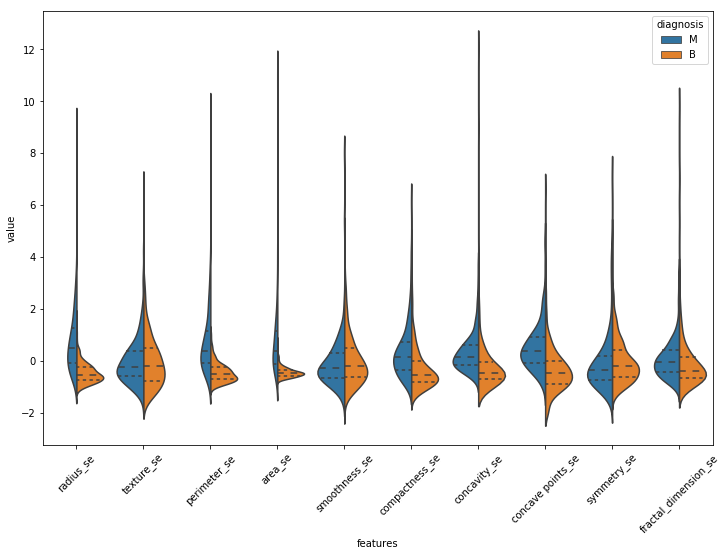

In [9]:
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1) #next 20 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
#plotting this data 
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data,
              split=True, inner='quart')
plt.xticks(rotation=45);

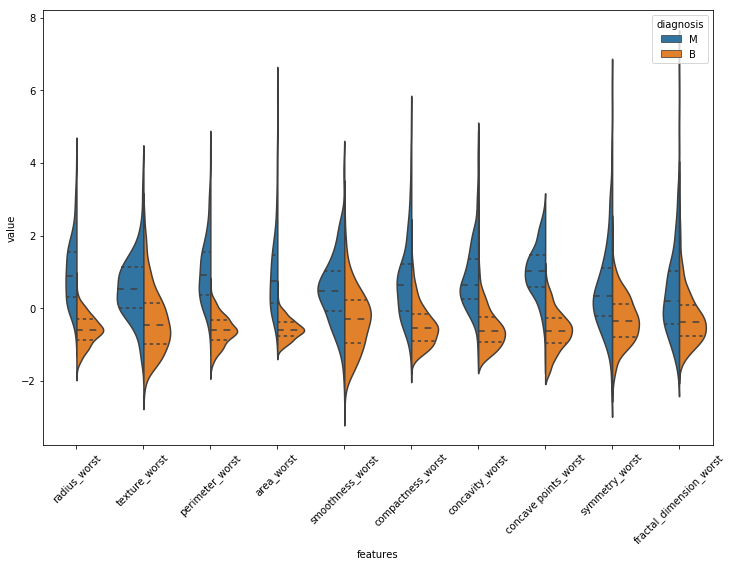

In [10]:
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1) #next 10 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
#plotting this data 
plt.figure(figsize=(12,8))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data,
              split=True, inner='quart')
plt.xticks(rotation=45);
#Observation: concavity_worst and concave points_worst seem to be correlated
#This can lead to redundancy

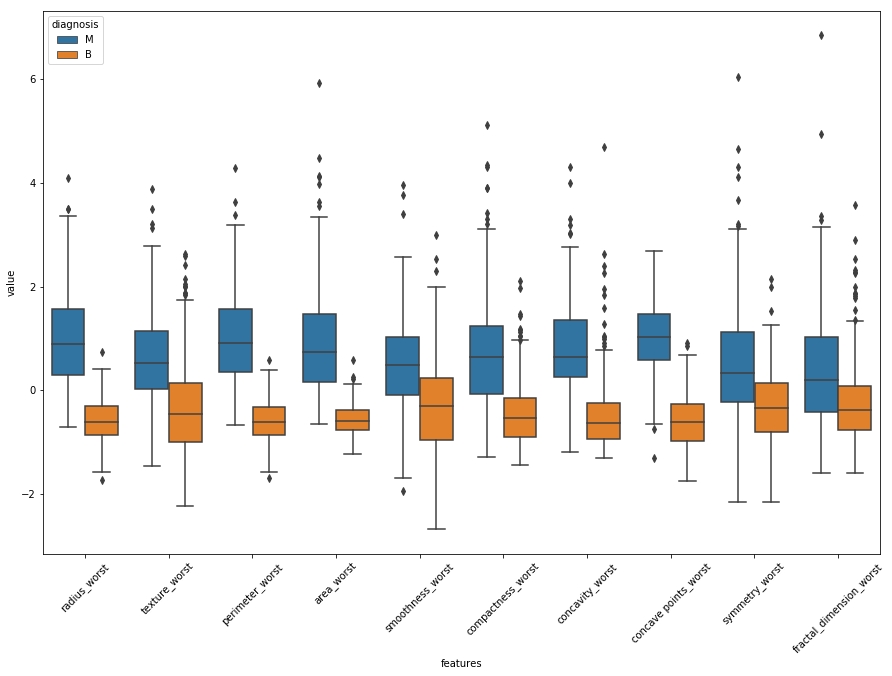

In [11]:
#using box-plots for outlier detection
plt.figure(figsize=(15,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

### Using Joint Plots for Feature Comparison


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


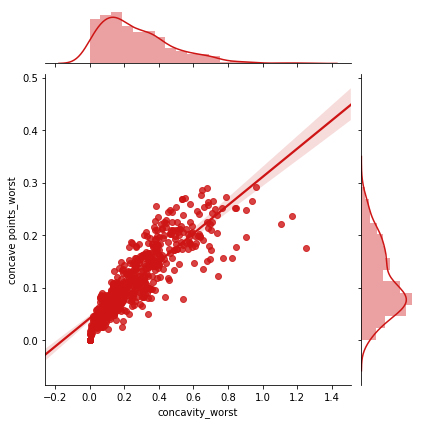

In [12]:
sns.jointplot(x.loc[:, 'concavity_worst'],
             x.loc[:, 'concave points_worst'],
             kind='regg',
             color='#ce1414');
#observation: Highly correlated features

### Observing the Distribution of Values and their Variance with Swarm Plots


In [13]:
#customizing seaborn charts
sns.set(style='whitegrid', palette='muted')

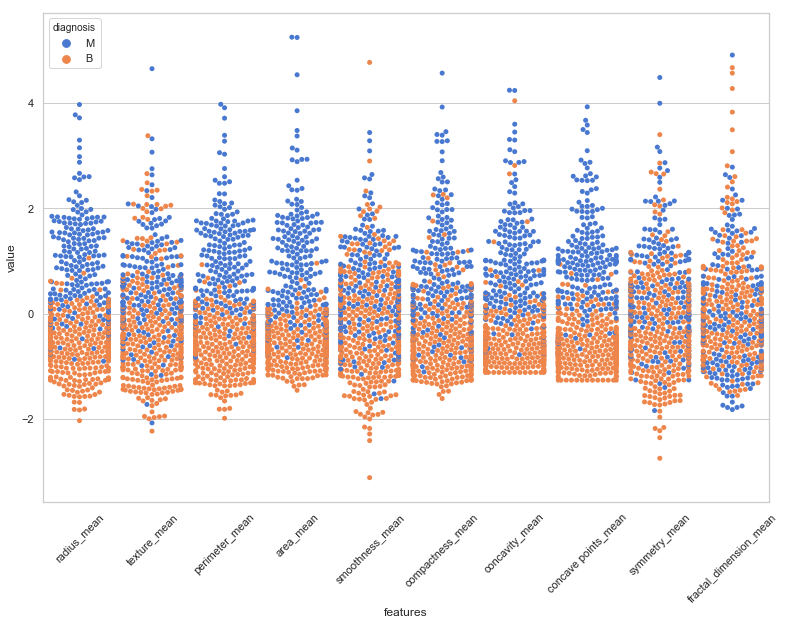

In [14]:
data = x
data_std = (data - data.mean()) / data.std()
#dividing the data into a wide structure
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1) #first 10 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
plt.figure(figsize=(13,9))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

#Observation: smoothness_mean is harder to classify
#           :area_mean can be used as a classification feature

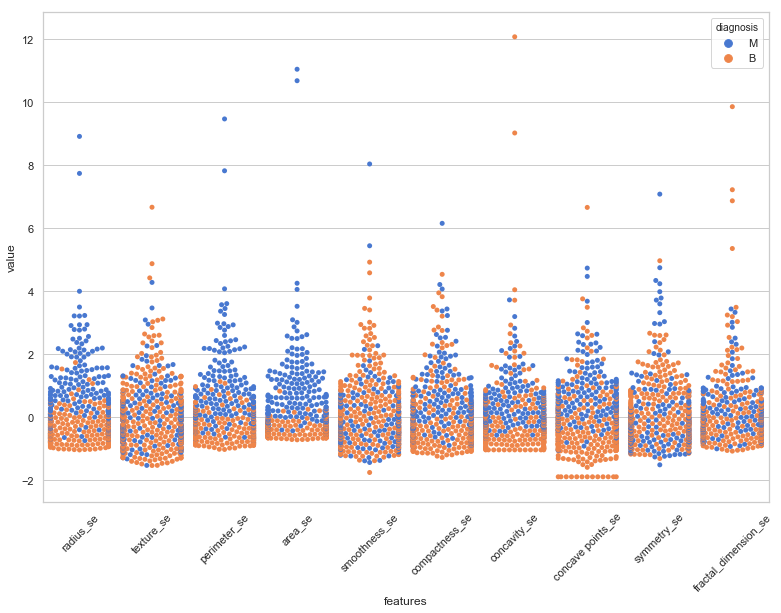

In [15]:
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1) #next 10 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
plt.figure(figsize=(13,9))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

#Observation: smoothness_se is harder to classify
#           : permimter_se is easier to classify

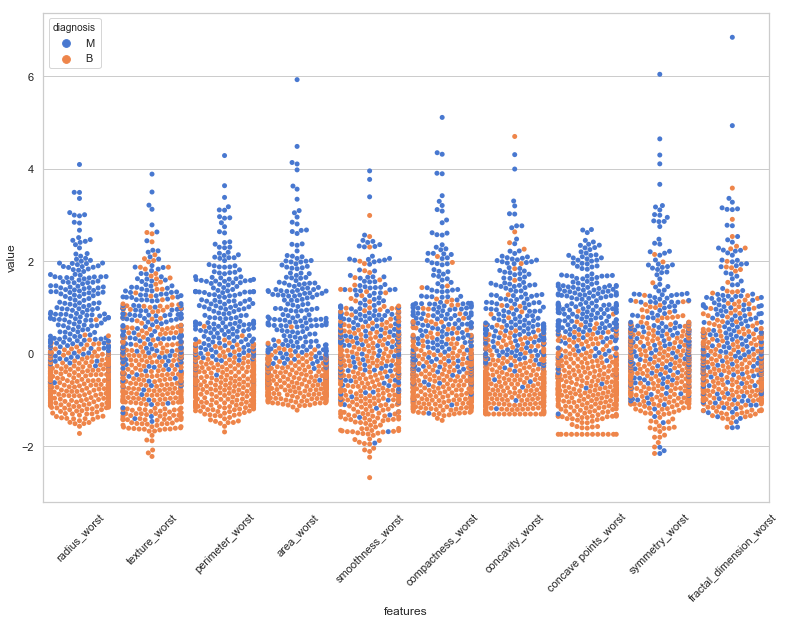

In [16]:
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1) #next 10 features
data = pd.melt(data, id_vars='diagnosis',
              var_name='features',
              value_name='value')
plt.figure(figsize=(13,9))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

#Observation: smoothness_worst is harder to classify
#           : permimter_worst is easier to classify

### Observing all Pair-wise Correlations


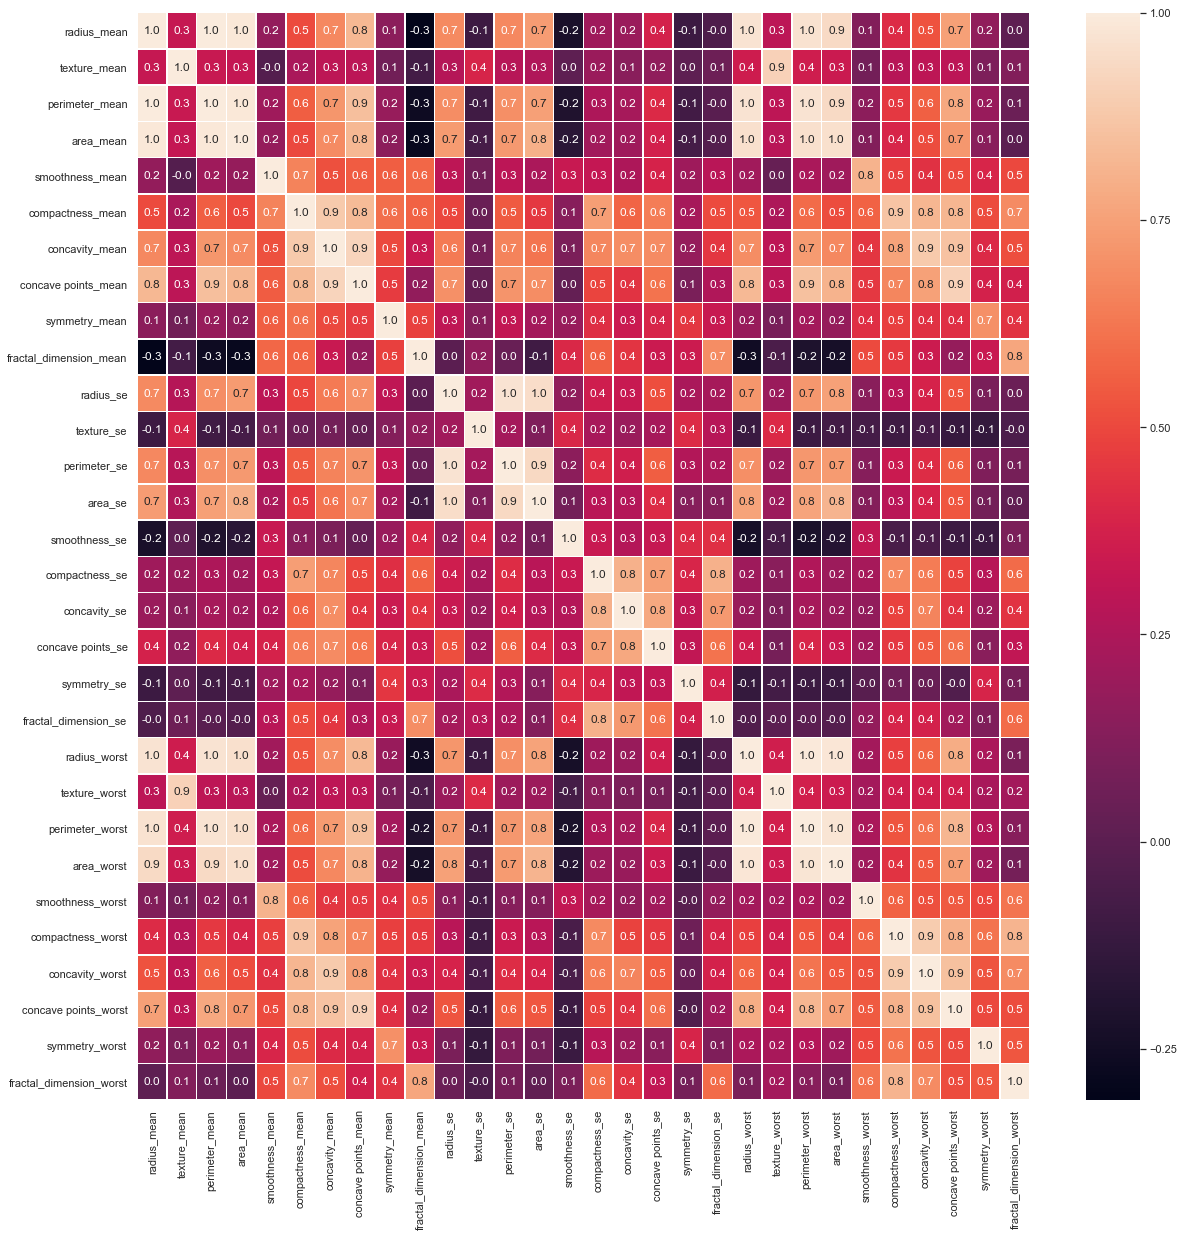

In [17]:
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax);

# _ _ _ _ _ _ _ _ _ _ _ Feature Selection and Classification _ _ _ _ _ _ _ _ _ _ _ 

###  Dropping Correlated Columns from Feature Matrix

In [18]:
drop_cols = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']

df = x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


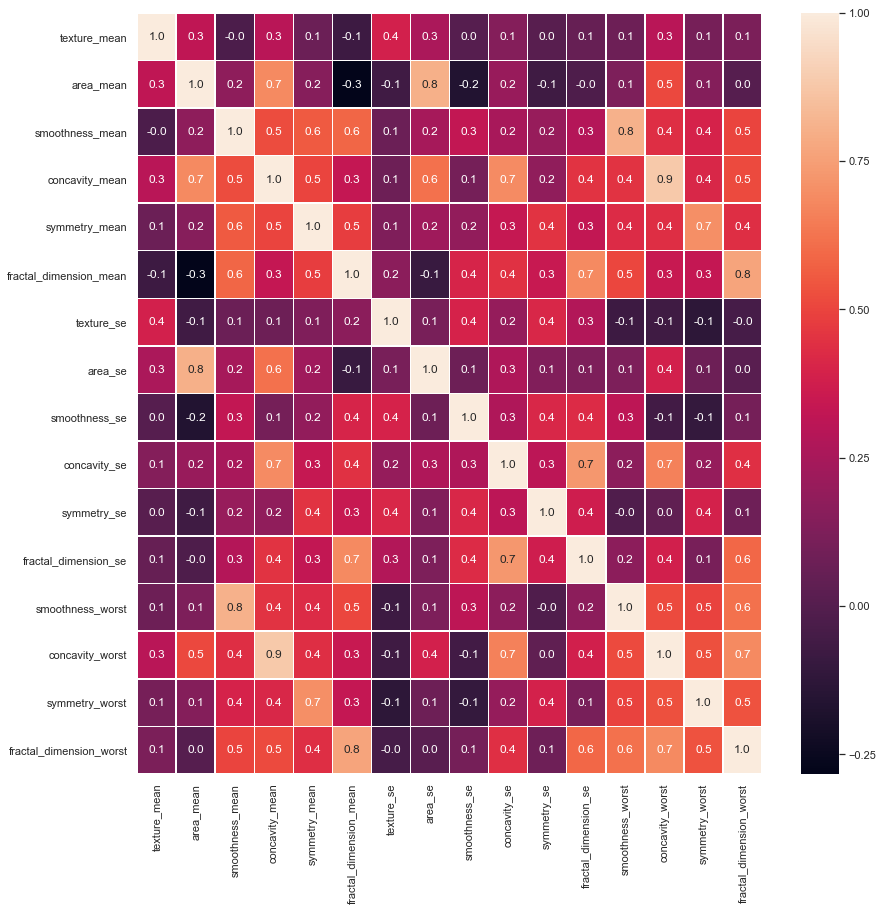

In [19]:
#creating the heatmap again after dropping the correlated features

f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax);
#annot gives values inside boxes
#fmt specifies precision 

### Classification using XGBoost (minimal feature selection)

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

#Creating a classifier 

clf_1 = xgb.XGBClassifier(random_state=42)
clf_1 = clf_1.fit(x_train, y_train) 

In [22]:
#Measuring accuracy of the classifier

print('Accuracy is: ', accuracy_score(y_test, clf_1.predict(x_test)))

Accuracy is:  0.9766081871345029


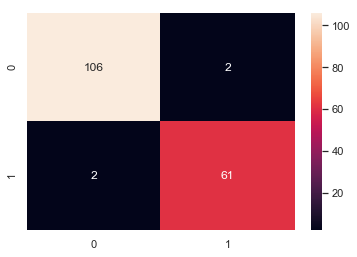

In [23]:
# Displaying the confusion matrix as a seaborn function

cm = confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d');

### Univariate Feature Selection and XGBoost

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train) #Top10 features from Chi2 test
#Printing the score list:
print('Score List: ', select_feature.scores_)
print(' ')
print('Feature List: ', x_train.columns)

Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
 
Feature List:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [26]:
#creating new train and test data based on top10 features

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

#creating a second classifier based on these new data

clf_2 = xgb.XGBClassifier().fit(x_train_2, y_train)

In [27]:
#Measuring accuracy of the second classifier

print('Accuracy is: ', accuracy_score(y_test, clf_2.predict(x_test_2)))

Accuracy is:  0.9824561403508771


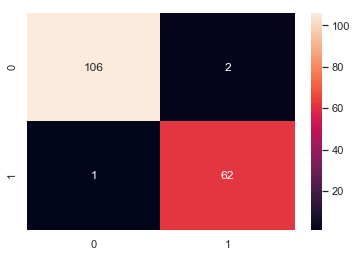

In [28]:
# Displaying the confusion matrix as a seaborn function

cm_2 = confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt='d');

###  Recursive Feature Elimination with Cross-Validation

Recursive Feature Elimination: We don't need to specify a number of features as it'll return optimum number of features!

In [29]:
from sklearn.feature_selection import RFECV

clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf_3, step=1, cv=5, scoring='accuracy', 
             n_jobs=-1).fit(x_train, y_train)
#step: specifies how many features we want to eliminate at each step
#cv: number of folds for cross validation
#scoring: method to score based on accuracy mostly
#n_jobs: specifying the number of CPU cores available (Max=-1)

In [30]:
#Optimal and best features:

print('Optimal number of features: ', rfecv.n_features_)
print(' ')
print('Best Features: ', x_train.columns[rfecv.support_])

Optimal number of features:  14
 
Best Features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


In [31]:
#Measuring accuracy of the third classifier

print('Accuracy is: ', accuracy_score(y_test, rfecv.predict(x_test)))

Accuracy is:  0.9824561403508771


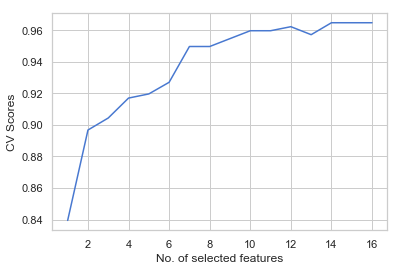

In [32]:
num_features = [i for i in range(1, len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel = 'No. of selected features', ylabel = 'CV Scores');

###  Feature Extraction using Principal Component Analysis

PCA: A technique used to reduce the number of features

In [33]:
#Creating new train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Normalizing the data before PCA
x_train_norm = (x_train - x_train.mean())/ (x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.mean())/ (x_test.max() - x_test.min())

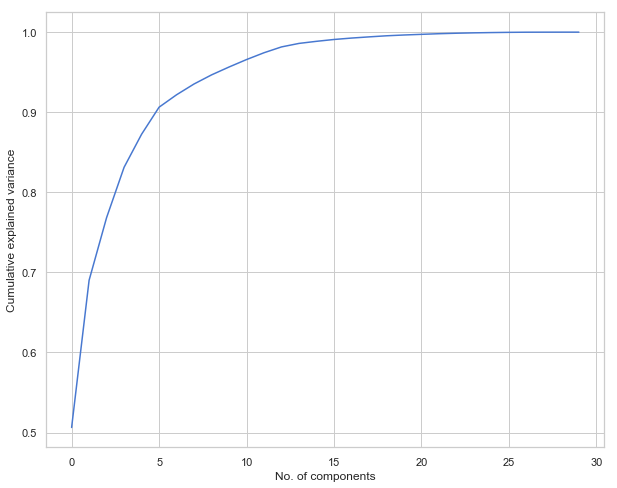

In [34]:
#Creating a PCA classifier
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_norm)

#Plotting the pca result
plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance');